## 1. Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. EDA

All data collected from [California Solar Energy Statistics and Data](https://ww2.energy.ca.gov/almanac/renewables_data/solar/index_cms.php) as detailed in data collection notebook.

#### Solar Production (PV + Thermal) by Plant

In [2]:
solar_prod = pd.read_csv('../data/CA_Solar_Production_Data/solar_pv_thermal_prod_ca.csv')

In [3]:
solar_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6416 entries, 0 to 6415
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     6416 non-null   int64  
 1   Year           6374 non-null   float64
 2   Company Name   6374 non-null   object 
 3   CEC Plant ID   6374 non-null   object 
 4   Plant Name     6374 non-null   object 
 5   State          6374 non-null   object 
 6   Capacity (MW)  6416 non-null   object 
 7   Net MWh        6416 non-null   float64
 8   type           6416 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 451.2+ KB


In [4]:
solar_prod = solar_prod.drop('Unnamed: 0', axis = 1)

In [5]:
solar_prod.columns = [col.lower().replace('(','').replace(')','').replace(' ','_') for col in solar_prod.columns]

In [6]:
solar_prod = solar_prod[solar_prod['capacity_mw'] != 'Total']

In [7]:
solar_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6374 entries, 0 to 6414
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          6374 non-null   float64
 1   company_name  6374 non-null   object 
 2   cec_plant_id  6374 non-null   object 
 3   plant_name    6374 non-null   object 
 4   state         6374 non-null   object 
 5   capacity_mw   6374 non-null   object 
 6   net_mwh       6374 non-null   float64
 7   type          6374 non-null   object 
dtypes: float64(2), object(6)
memory usage: 448.2+ KB


In [8]:
solar_prod.year = [int(year) for year in solar_prod['year']]

In [9]:
solar_prod['year']

0       2021
1       2021
2       2021
3       2021
4       2021
        ... 
6410    2001
6411    2001
6412    2001
6413    2001
6414    2001
Name: year, Length: 6374, dtype: int64

In [34]:
solar_prod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6374 entries, 0 to 6414
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          6374 non-null   int64  
 1   company_name  6374 non-null   object 
 2   cec_plant_id  6374 non-null   object 
 3   plant_name    6374 non-null   object 
 4   state         6374 non-null   object 
 5   capacity_mw   6374 non-null   object 
 6   net_mwh       6374 non-null   float64
 7   type          6374 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 448.2+ KB


In [55]:
solar_prod.groupby('company_name').sum()['net_mwh'].sort_values(ascending=False)[1:11]

company_name
BHE Renewables, LLC                  12090123.0
S-Power (Sustainable Power Group)    11231855.0
Topaz Solar Farms LLC                10514001.0
Southern Power Company                9804042.0
Clearway Energy                       8722899.0
CED California Holdings LLC           7324102.0
CD Arevon USA Inc.                    6877814.0
Solar Partners I II VIII LLC          5654120.0
Desert Sunlight 300 LLC               5554757.0
AV Solar Ranch 1 LLC                  5168961.0
Name: net_mwh, dtype: float64

''

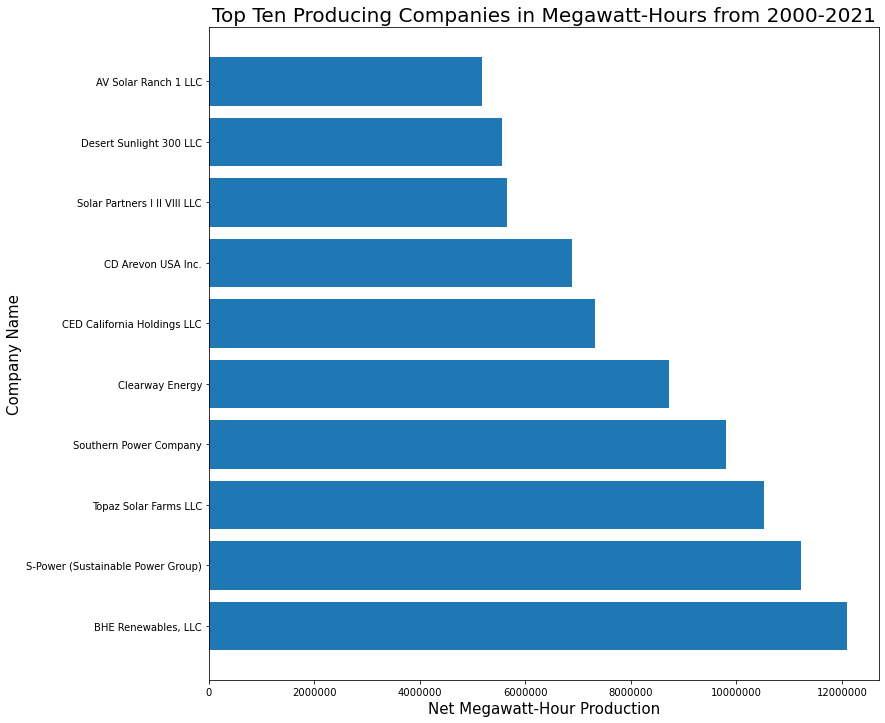

In [85]:
fig, ax = plt.subplots(figsize = (12,12))

ax.barh(solar_prod.groupby('company_name').sum()['net_mwh'].sort_values(ascending=False)[1:11].index, solar_prod.groupby('company_name').sum()['net_mwh'].sort_values(ascending=False)[1:11])


ax.set_title('Top Ten Producing Companies in Megawatt-Hours from 2000-2021', fontsize = 20)
ax.set_xlabel('Net Megawatt-Hour Production', fontsize = 15)
ax.set_ylabel('Company Name', fontsize = 15)
ax.ticklabel_format(axis = 'x',style='plain')
;

In [111]:
solar_prod.groupby('company_name').sum()['net_mwh'].sort_values(ascending=True)[:10]

company_name
Redwood Coast Energy Authority                    22.0
eSolar Inc                                      1756.0
Strata Clean Energy                            10645.0
Green Light Energy Corporation                 13295.0
Southwestern Community College                 14305.0
GreenLead-TNX Management                       15956.0
Lemoore PV 1 LLC                               16118.0
San Diego County Regional Airport Authority    16870.0
Dependable Highway Express Inc                 18093.0
San Diego City of                              19154.0
Name: net_mwh, dtype: float64

In [ ]:
fig, ax = plt.subplots(figsize = (12,12))

ax.barh(solar_prod.groupby('company_name').sum()['net_mwh'].sort_values(ascending=True)[1:11].index, solar_prod.groupby('company_name').sum()['net_mwh'].sort_values(ascending=False)[1:11])


ax.set_title('Top Ten Producing Companies in Megawatt-Hours from 2000-2021', fontsize = 20)
ax.set_xlabel('Net Megawatt-Hour Production', fontsize = 15)
ax.set_ylabel('Company Name', fontsize = 15)
ax.ticklabel_format(axis = 'x',style='plain')
;

In [119]:
solar_prod[solar_prod['company_name'].str.contains('Power')]

,year,company_name,cec_plant_id,plant_name,state,capacity_mw,net_mwh,type
4,2021,Los Angeles Department of Water & Power (LADWP),S0218,Adelanto Solar Power Project,CA,10.0,8724.0,pv
6,2021,Southern Power Company,S0308,Adobe Solar,CA,20.0,46569.0,pv
8,2021,Altus Power America Inc,S0116,Aerojet I (3.6MW) Solar Plant,CA,3.6,5916.0,pv
9,2021,Altus Power America Inc,S0130,Aerojet II (2.4MW) Solar Plant,CA,2.4,4042.0,pv
14,2021,Algonquin Power Sanger LLC,S0606,Algonquin Power SKIC 10 Solar LLC,CA,10.0,19730.0,pv
...,...,...,...,...,...,...,...,...
6074,2011,PureGen Power,S0222,RE North Face,CA,1.0,1904.0,pv
6107,2010,Altus Power America Inc,S0116,Aerojet I (3.6MW) Solar Plant,CA,3.6,6296.0,pv
6108,2010,Altus Power America Inc,S0130,Aerojet II (2.4MW) Solar Plant,CA,2.4,2858.0,pv
6118,2010,PureGen Power,S0222,RE North Face,CA,1.0,2087.0,pv


### Annual Solar Energy Production

In [10]:
annual = pd.read_csv('../data/CA_Solar_Production_Data/solar_pv_thermal_prod_annual.csv')

In [11]:
annual = annual.drop('Unnamed: 0', axis = 1)
annual.head()

,Year,Capacity (MW),Net MWh
0,2021,16854.3,37824855
1,2020,15955.0,34275146
2,2019,14267.1,32829129
3,2018,13549.1,31836865
4,2017,12710.6,28617314


''

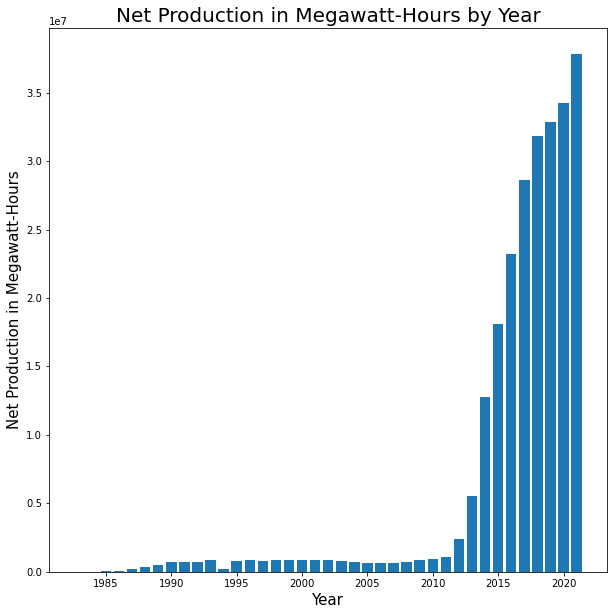

In [13]:
fig, ax = plt.subplots(figsize = (10,10))

ax.bar(annual['Year'], annual['Net MWh'])

ax.set_title('Net Production in Megawatt-Hours by Year', fontsize = 20)
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Net Production in Megawatt-Hours', fontsize = 15)
#ax.set_yscale('log')
;

''

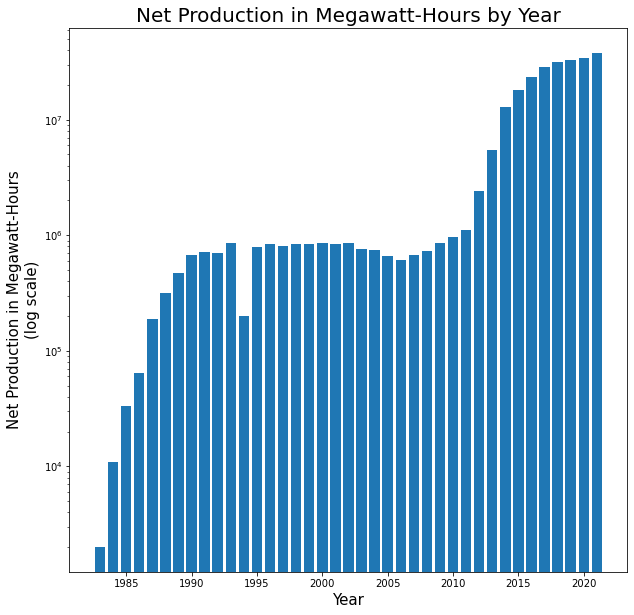

In [109]:
fig, ax = plt.subplots(figsize = (10,10))

ax.bar(annual['Year'], annual['Net MWh'])

ax.set_title('Net Production in Megawatt-Hours by Year', fontsize = 20)
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Net Production in Megawatt-Hours\n(log scale)', fontsize = 15)
ax.set_yscale('log')
;

In [15]:
solar_prod.groupby('type').mean()

,year,net_mwh
type,,
pv,2017.139418,28834.015943
therm,2011.797357,124570.678414


### Energy Production By County

In [16]:
county_data = pd.read_csv('../data/CA_Solar_Production_Data/solar_pv_thermal_prod_county.csv')

In [17]:
county_data = county_data.drop('Unnamed: 0', axis = 1)

In [18]:
county_data.columns = [col.lower().replace('(','').replace(')','').replace(' ','_') for col in county_data.columns]

In [19]:
county_data.head()

,county,capacity_mw,net_mwh,year
0,Alameda,17.8,29393,2021
1,Amador,1.5,1971,2021
2,Butte,8.7,13324,2021
3,Calaveras,1.8,2838,2021
4,"Clark, NV",811.6,2000674,2021


In [21]:
county_data[county_data.year == 2020].groupby('county').head()

,county,capacity_mw,net_mwh,year
47,Alameda,17.8,29393,2020
48,Amador,1.5,1971,2020
49,Butte,8.7,13208,2020
50,Calaveras,1.8,2838,2020
51,"Clark, NV",811.6,2049265,2020
52,Contra Costa,42.5,74612,2020
53,Fresno,1008.1,1877875,2020
54,Glenn,1.5,3499,2020
55,Humboldt,8.5,14896,2020
56,Imperial,1708.5,4002123,2020


In [22]:
county_data[county_data.county == 'San Diego'].year

28     2021
75     2020
122    2019
169    2018
214    2017
259    2016
302    2015
344    2014
384    2013
423    2012
447    2011
461    2010
470    2009
477    2008
Name: year, dtype: int64

In [23]:
county_data.county.unique()

array(['Alameda', 'Amador', 'Butte', 'Calaveras', 'Clark, NV',
       'Contra Costa', 'Fresno', 'Glenn', 'Humboldt', 'Imperial', 'Kern',
       'Kings', 'Lake', 'Lassen', 'Los Angeles', 'Madera', 'Maricopa, AZ',
       'Marin', 'Mendocino', 'Merced', 'Monterey', 'Napa', 'Orange',
       'Placer', 'Riverside', 'Sacramento', 'San Benito',
       'San Bernardino', 'San Diego', 'San Francisco', 'San Joaquin',
       'San Luis Obispo', 'Santa Barbara', 'Santa Clara', 'Santa Cruz',
       'Shasta', 'Solano', 'Sonoma', 'Stanislaus', 'Sutter', 'Tehama',
       'Tulare', 'Tuolumne', 'Ventura', 'Yolo', 'Yuba', 'Yuma, AZ'],
      dtype=object)

In [24]:
top_counties = [cty for cty in county_data[county_data.year == 2021].sort_values(by='net_mwh', ascending = False).county]

In [107]:
top_counties[:10]

['Kern',
 'Riverside',
 'Imperial',
 'Los Angeles',
 'San Bernardino',
 'San Luis Obispo',
 'Fresno',
 'Clark, NV',
 'Kings',
 'Maricopa, AZ']

''

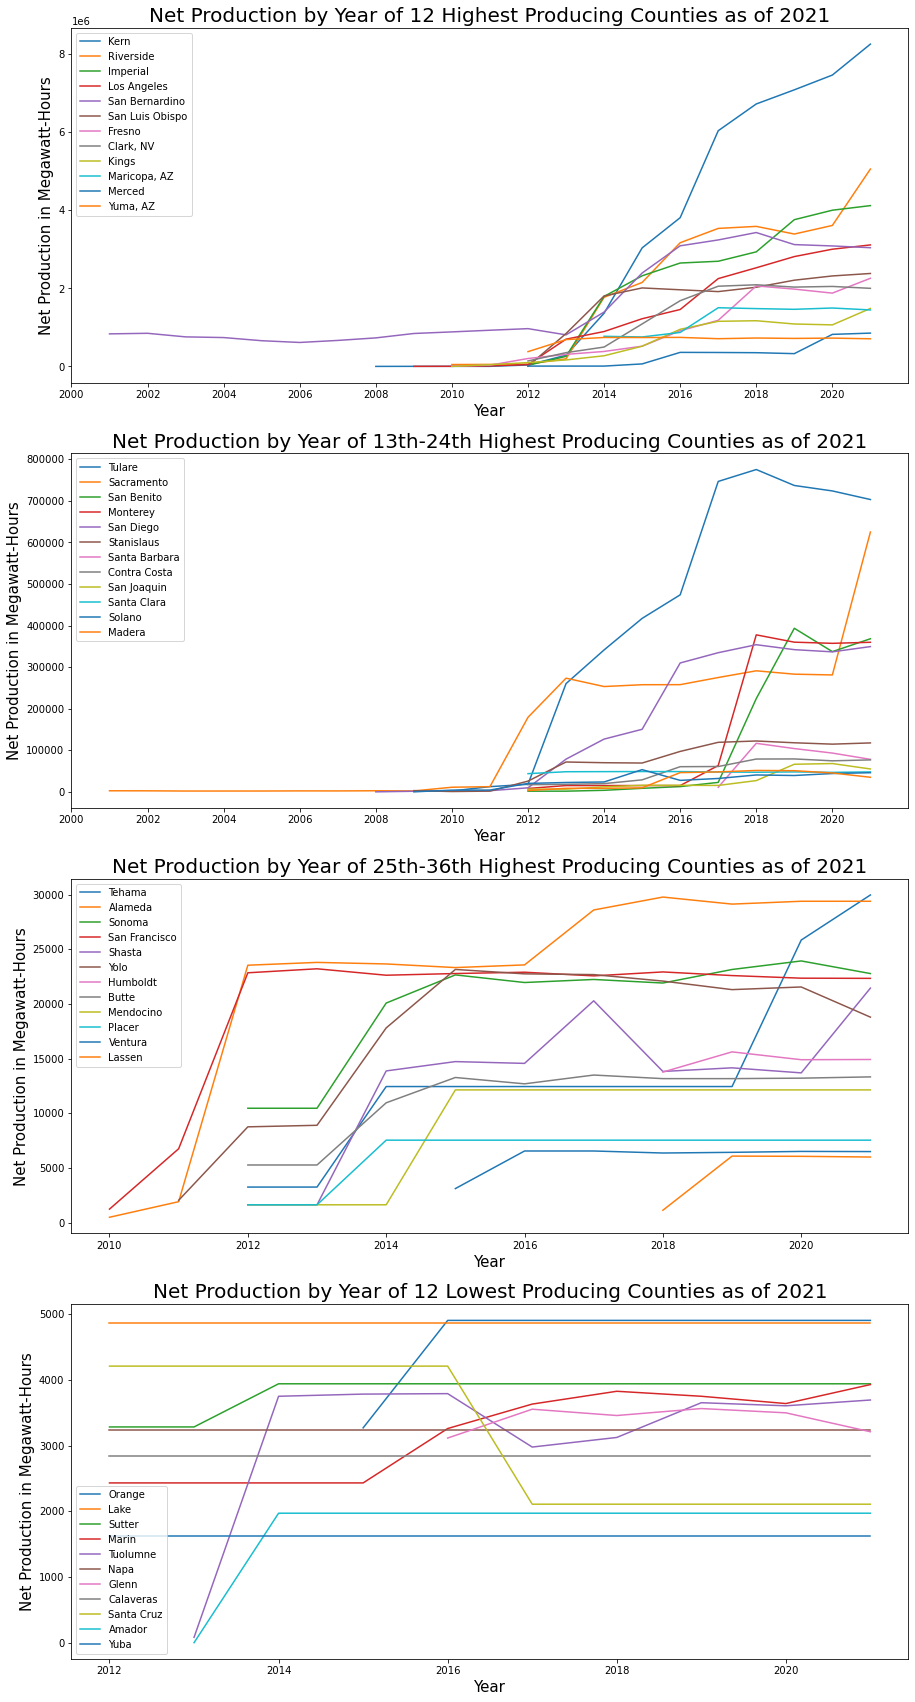

In [27]:
fig, axes = plt.subplots(4,1,figsize = (15,30))

i = 0
for ax in axes:
    for cty in top_counties[i:i+12]:
        ax.plot(county_data[county_data.county == cty].year,county_data[county_data.county == cty].net_mwh, label = cty)
    i+=12
    ax.legend()
    ax.set_xlabel('Year', fontsize = 15)
    ax.set_ylabel('Net Production in Megawatt-Hours', fontsize = 15)
    ax.ticklabel_format(style='sci')
axes[0].set_xticks(ticks=range(2000,2022,2))
axes[1].set_xticks(ticks=range(2000,2022,2))
axes[2].set_xticks(ticks=range(2010,2022,2))
axes[3].set_xticks(ticks=range(2012,2022,2))

axes[0].set_title('Net Production by Year of 12 Highest Producing Counties as of 2021', fontsize = 20)
axes[1].set_title('Net Production by Year of 13th-24th Highest Producing Counties as of 2021', fontsize = 20)
axes[2].set_title('Net Production by Year of 25th-36th Highest Producing Counties as of 2021', fontsize = 20)
axes[3].set_title('Net Production by Year of 12 Lowest Producing Counties as of 2021', fontsize = 20)

;

### Imported Energy

In [31]:
imported = pd.read_csv('../data/CA_Solar_Production_Data/solar_pv_thermal_prod_imported.csv')

In [32]:
imported = imported.drop('Unnamed: 0', axis = 1)

In [33]:
imported.head()

,Year,Company Name,CEC Plant ID,Plant Name,State,Capacity (MW),Net MWh
0,2021.0,Agua Caliente Solar LLC,S0242,Agua Caliente Solar (AZ),AZ,290.0,707643.0
1,2021.0,LS Power,S0292,Arlington Valley Solar Energy II,AZ,129.0,353291.0
2,2021.0,Copper Mountain Solar,S0243,Copper Mountain I (NV),NV,58.0,115417.0
3,2021.0,Copper Mountain Solar,S0244,Copper Mountain II (NV),NV,155.0,359174.0
4,2021.0,Copper Mountain Solar,S0295,Copper Mountain III (NV),NV,255.0,607133.0


In [92]:
imported.columns = [col.lower().replace('(','').replace(')','').replace(' ','_') for col in imported.columns]
imported.columns

Index(['year', 'company_name', 'cec_plant_id', 'plant_name', 'state',
       'capacity_mw', 'net_mwh'],
      dtype='object')

In [94]:
imported.groupby('company_name').sum()

,year,net_mwh
company_name,,
Agua Caliente Solar LLC,20165.0,6877036.0
Copper Mountain Solar,68581.0,9924616.0
LS Power,16140.0,2840997.0
Mesquite Solar 1 LLC,40362.0,6945306.0
"Silver State Solar Power South, LLC",14126.0,4063539.0


In [95]:
top_imports = [name for name in imported.groupby('company_name').sum().index]

In [96]:
top_imports

['Agua Caliente Solar LLC',
 'Copper Mountain Solar',
 'LS Power',
 'Mesquite Solar 1 LLC',
 'Silver State Solar Power South, LLC']

''

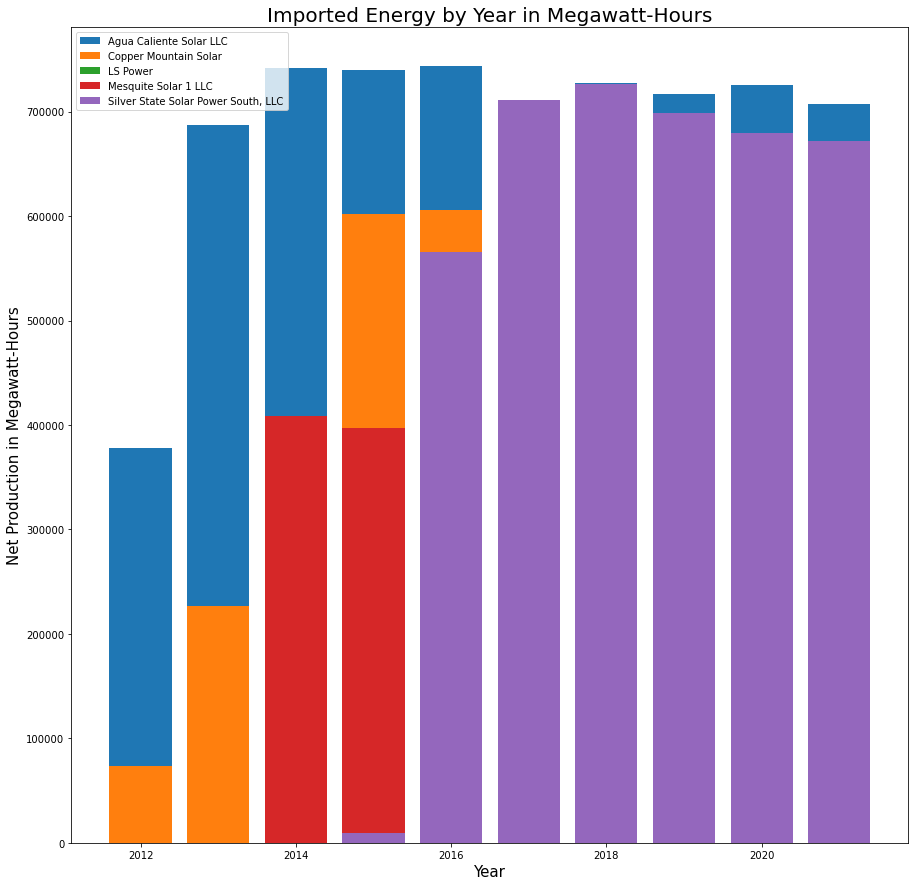

In [106]:
fig, ax = plt.subplots(figsize = (15,15))


for comp in top_imports:
    ax.bar(imported[imported['company_name'] == comp].year,imported[imported['company_name'] == comp].net_mwh, label = comp)
ax.legend()
ax.set_title('Imported Energy by Year in Megawatt-Hours', fontsize = 20)
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Net Production in Megawatt-Hours', fontsize = 15)
ax.ticklabel_format(style='sci')

;

## 3. Conclusions

One kilowatt-hour (kwH) of energy production in the US from natural gas, petroleum, and coal produces an average of 0.85 lbs of CO2 as waste, among other particulates. Thus, one megawatt-hour (MwH) produces approximately 850 lbs of atmospheric carbon, or 0.43 tons. In 2020, the US produced approximately 1.7 billion tons of CO2 waste. California produced approximately 37.5 million MwH in 2021, which equates to approximately 16.1 million tons of CO2 saved from emission. This accounted for approximately 1% of the total CO2 emissions in the US from energy production.

As we are only looking at one state that continues to increase production, it is clear that national solar adoption has the potential to significantly reduce CO2 emissions from energy production. Similar investment and public policy like the SunShot Initiative in 2011 must be formed as to the early 2010s, when CA saw a massive increase in solar energy production from both photovoltaic and thermal sources.